# Interpolations

Simulate two macro-spins with anisotropy, where the MEP is given by an asynchronous rotation of the spins

In [ ]:
# FIDIMAG:
from fidimag.micro import Sim
from fidimag.common import CuboidMesh
from fidimag.micro import UniformExchange, UniaxialAnisotropy
from fidimag.common.nebm_spherical import NEBM_Spherical
from fidimag.common.nebm_geodesic import NEBM_Geodesic
import fidimag.common.nebm_geodesic

import numpy as np
import matplotlib.pyplot as plt

In [373]:
# Material Parameters
# Parameters
A = 1e-12
Kx = 1e5
# Strong anisotropy
Ms = 3.8e5


"""
We will define two particles using a 4 sites mesh, letting the
sites in the middle as Ms = 0

"""


def two_part(pos):

    x = pos[0]

    if x > 6 or x < 3:
        return Ms
    else:
        return 0

# Finite differences mesh
mesh = CuboidMesh(nx=3,
                  ny=1,
                  nz=1,
                  dx=3, dy=3, dz=3,
                  unit_length=1e-9
                  )


# Prepare simulation
# We define the cylinder with the Magnetisation function
sim = Sim(mesh)
sim.Ms = two_part

# sim.add(UniformExchange(A=A))

# Uniaxial anisotropy along x-axis
sim.add(UniaxialAnisotropy(Kx, axis=(1, 0, 0)))

def mid_m(pos):
    if pos[0] > 4:
        return (0.5, 0, 0.2)
    else:
        return (-0.5, 0, 0.2)

init_im = [(-1, 0, 0), mid_m, (1, 0, 0)]
interp = [6, 6]

# Define many initial states close to one extreme. We want to check
# if the images in the last step, are placed mostly in equally positions
init_images = init_im
interpolations = interp

neb = NEBM_Geodesic(sim,
                    init_images,
                    interpolations=interpolations,
                    spring_constant=100,
                    name='test',
                    integrator='sundials'
                    )

neb.relax(max_iterations=2000,
          save_vtks_every=1000,
          save_npys_every=1000,
          stopping_dYdt=1e-4,
          dt=1e-6
          )

DEBUG:fidimag:Relaxation parameters: stopping_dYdt=0.0001, time_step=1e-06 s,  max_iterations=2000.
DEBUG:fidimag:2019-02-19 15:11:08 step: 1, step_size: 1e-06, max dYdt: 2.36e+05 max|G|: 9.9e+04 max|gradE|: 2.09e+05 and max|F_k|: 11.7
DEBUG:fidimag:2019-02-19 15:11:08 step: 2, step_size: 1e-06, max dYdt: 2.02e+04 max|G|: 6.78e+04 max|gradE|: 2.09e+05 and max|F_k|: 19.2
DEBUG:fidimag:2019-02-19 15:11:08 step: 3, step_size: 1e-06, max dYdt: 1.37e+04 max|G|: 4.38e+04 max|gradE|: 2.09e+05 and max|F_k|: 24.9
DEBUG:fidimag:2019-02-19 15:11:08 step: 4, step_size: 1e-06, max dYdt: 9.1e+03 max|G|: 3.03e+04 max|gradE|: 2.09e+05 and max|F_k|: 28.1
DEBUG:fidimag:2019-02-19 15:11:08 step: 5, step_size: 1e-06, max dYdt: 6.02e+03 max|G|: 1.99e+04 max|gradE|: 2.09e+05 and max|F_k|: 30.6
DEBUG:fidimag:2019-02-19 15:11:08 step: 6, step_size: 1e-06, max dYdt: 3.97e+03 max|G|: 1.31e+04 max|gradE|: 2.09e+05 and max|F_k|: 32.2
DEBUG:fidimag:2019-02-19 15:11:08 step: 7, step_size: 1e-06, max dYdt: 2.61e+03 

DEBUG:fidimag:2019-02-19 15:11:09 step: 63, step_size: 0.000826, max dYdt: 1.39 max|G|: 8.31 max|gradE|: 2.09e+05 and max|F_k|: 7.94
DEBUG:fidimag:2019-02-19 15:11:09 step: 64, step_size: 0.000826, max dYdt: 1.26 max|G|: 7.81 max|gradE|: 2.09e+05 and max|F_k|: 7.24
DEBUG:fidimag:2019-02-19 15:11:09 step: 65, step_size: 0.000826, max dYdt: 1.15 max|G|: 7.31 max|gradE|: 2.09e+05 and max|F_k|: 6.63
DEBUG:fidimag:2019-02-19 15:11:09 step: 66, step_size: 0.000826, max dYdt: 1.06 max|G|: 6.77 max|gradE|: 2.09e+05 and max|F_k|: 6.09
DEBUG:fidimag:2019-02-19 15:11:09 step: 67, step_size: 0.000826, max dYdt: 0.997 max|G|: 6.13 max|gradE|: 2.09e+05 and max|F_k|: 5.87
DEBUG:fidimag:2019-02-19 15:11:09 step: 68, step_size: 0.00125, max dYdt: 0.95 max|G|: 5.7 max|gradE|: 2.09e+05 and max|F_k|: 5.54
DEBUG:fidimag:2019-02-19 15:11:09 step: 69, step_size: 0.00125, max dYdt: 0.896 max|G|: 6.67 max|gradE|: 2.09e+05 and max|F_k|: 5.22
DEBUG:fidimag:2019-02-19 15:11:09 step: 70, step_size: 0.00125, max dY

DEBUG:fidimag:2019-02-19 15:11:11 step: 125, step_size: 0.0297, max dYdt: 6.58e-05 max|G|: 7.54 max|gradE|: 2.04e+05 and max|F_k|: 0.000286
INFO:fidimag:Relaxation finished at time step = 125, t = 0.48, call rhs = 945 and max_dYdt = 6.58e-05


Get the interpolated data

In [374]:
neb.compute_polynomial_factors()
interp_x, interp_y = neb.compute_polynomial_approximation_energy(200)

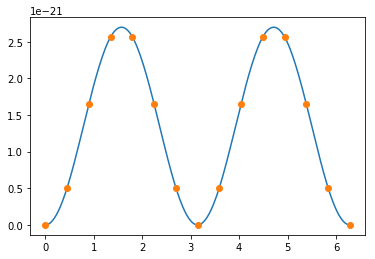

In [375]:
plt.plot(interp_x, interp_y)
plt.plot(neb.path_distances, neb.energies, 'o')

In [376]:
# Set the climbing and falling images
neb.climbing_image = [3, 10, -7]
neb.relax(max_iterations=2000,
          save_vtks_every=1000,
          save_npys_every=1000,
          stopping_dYdt=1e-4,
          dt=1e-6,
          save_initial_state=False
          )

DEBUG:fidimag:Relaxation parameters: stopping_dYdt=0.0001, time_step=1e-06 s,  max_iterations=2000.
DEBUG:fidimag:2019-02-19 15:11:14 step: 126, step_size: 0.0297, max dYdt: 1.26 max|G|: 8.63 max|gradE|: 2.09e+05 and max|F_k|: 15.2
DEBUG:fidimag:2019-02-19 15:11:14 step: 127, step_size: 0.00302, max dYdt: 0.213 max|G|: 5.7 max|gradE|: 2.09e+05 and max|F_k|: 14.8
DEBUG:fidimag:2019-02-19 15:11:14 step: 128, step_size: 0.00302, max dYdt: 0.179 max|G|: 2.48 max|gradE|: 2.09e+05 and max|F_k|: 14.5
DEBUG:fidimag:2019-02-19 15:11:14 step: 129, step_size: 0.00302, max dYdt: 0.15 max|G|: 2.48 max|gradE|: 2.09e+05 and max|F_k|: 14.2
DEBUG:fidimag:2019-02-19 15:11:14 step: 130, step_size: 0.00302, max dYdt: 0.126 max|G|: 6.3 max|gradE|: 2.09e+05 and max|F_k|: 14
DEBUG:fidimag:2019-02-19 15:11:14 step: 131, step_size: 0.00302, max dYdt: 0.105 max|G|: 8.23 max|gradE|: 2.09e+05 and max|F_k|: 13.9
DEBUG:fidimag:2019-02-19 15:11:14 step: 132, step_size: 0.00302, max dYdt: 0.0882 max|G|: 8 max|gradE|:

We can see that climbing image and the falling image successfully move to the sadddle point and local minimum

In [377]:
neb.compute_polynomial_factors()
interp_x, interp_y = neb.compute_polynomial_approximation_energy(200)

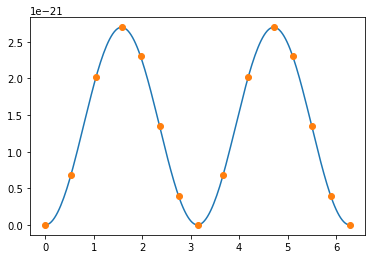

In [378]:
plt.plot(interp_x, interp_y)
plt.plot(neb.path_distances, neb.energies, 'o')

We can plot the x component of the spin 0, 1 and 2. Spin 1 has Ms=0 so no component 

In [379]:
mx0 = neb.band.reshape(-1, neb.n_dofs_image)[:, 0]
mx1 = neb.band.reshape(-1, neb.n_dofs_image)[:, 3]
mx2 = neb.band.reshape(-1, neb.n_dofs_image)[:, 6]

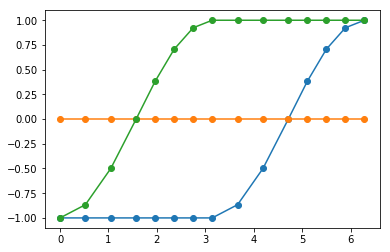

In [380]:
plt.plot(neb.path_distances, mx0, 'o-')
plt.plot(neb.path_distances, mx1, 'o-')
plt.plot(neb.path_distances, mx2, 'o-')

# Cubic interpolation

We can attempt to interpolate every spin component: mx0, mx1, mx2, my0, ... etc. We will start with mx0, which is the 0th component in every band image array

In [107]:
i_factors = [None for i in range(4)]

In [108]:
neb.scale

array([1.28930963e-26, 1.28930963e-26, 1.28930963e-26, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.28930963e-26, 1.28930963e-26,
       1.28930963e-26])

In [228]:
neb.compute_effective_field_and_energy(neb.band)
# fidimag.common.nebm_geodesic.nebm_clib.project_images(neb.gradientE, neb.band, neb.n_images, neb.n_dofs_image)

To interpolate the spin component we use: $d m_x / ds = (d m_x^{(0)} / dE)  * dE / ds = H_{x(0),\text{eff}}^{-1} (\mathbf{H}_{\text{eff}}\cdot\mathbf{t})$

$dE/ds$ is the energy tangent, which translates into the gradient (wrt to $m$) along the path by the tangents to the curve

Check: https://aip.scitation.org/doi/10.1063/1.1323224

In [229]:
deltas = np.zeros(neb.n_images)
for i in range(neb.n_images):
    deltas[i] = np.dot(neb.scale * (neb.gradientE).reshape(neb.n_images, -1)[i],
                       neb.tangents.reshape(neb.n_images, -1)[i]
                       )
    # Scale by the 0th spin component in the array and
    # divide by the x component of the effective field for the 0th spin
    den = neb.scale[0] * (neb.gradientE).reshape(neb.n_images, -1)[i][0]
    if den != 0:
        deltas[i] = deltas[i] / den
    else:
        print(i, deltas[i])
        deltas[i] = 0

0 0.0
14 0.0


In [230]:
i_factors[3] = mx0
i_factors[2] = deltas

In [231]:
i_factors[1] = np.zeros(neb.n_images)
i_factors[0] = np.zeros(neb.n_images)
ds = neb.path_distances
for i in range(neb.n_images - 1):
    i_factors[1][i] = -(deltas[i + 1] + 2 * deltas[i]) / (ds[i + 1] - ds[i])
    i_factors[1][i] += 3 * (mx0[i + 1] - mx0[i]) / (ds[i + 1] - ds[i]) ** 2.
    
    i_factors[0][i] = (deltas[i + 1] + deltas[i]) / (ds[i + 1] - ds[i]) ** 2.
    i_factors[0][i] -= 2 * (mx0[i + 1] - mx0[i]) / (ds[i + 1] - ds[i]) ** 3.

In [232]:
i_factors

[array([ 1.57944285,  3.15884928,  1.5794361 , -1.57945529, -3.15888383,
        -1.57944962, -0.03215705, -0.09230792, -0.13831555, -0.54978485,
        -0.5496781 , -0.1380243 , -0.09221273, -0.03238707,  0.        ]),
 array([-0.82699716, -2.48096152, -1.65398289,  0.82699643,  2.48097963,
         1.65397918,  0.5061662 ,  0.46745168,  0.35749071,  0.34479872,
         0.30284896, -0.19469794, -0.35874835, -0.46816933,  0.        ]),
 array([ 0.00000000e+00,  4.33013394e-01,  4.33011317e-01, -5.37187116e-13,
        -4.33012762e-01, -4.33005494e-01, -3.11910351e-06,  3.82660922e-01,
         7.07092416e-01,  9.23876783e-01,  9.40325534e-01,  9.23881179e-01,
         7.07109847e-01,  3.82686577e-01,  0.00000000e+00]),
 array([-1.00000000e+00, -1.00000036e+00, -9.99999140e-01, -9.99999520e-01,
        -9.99999620e-01, -9.99999231e-01, -9.99998760e-01, -9.23890565e-01,
        -7.07122221e-01, -3.82690087e-01,  1.82819533e-11,  3.82679459e-01,
         7.07103928e-01,  9.23878261e-01,

The interpolation:

In [236]:
x = np.linspace(0, neb.path_distances[-1], 200)
y = np.zeros_like(x)

for i, yi in enumerate(y):
    
    # ds = self.path_distances
    if x[i] < 0.0 or x[i] > ds[-1]:
        raise Exception('x lies outside the valid interpolation range')
    # Find index of the ds array for the value that is closest to x
    ds_idx = np.abs(x[i] - ds).argmin()
    # If x is smaller than the given ds, use the previous ds value so
    # that we use ds(i) when x lies in the interval ds(i) < x < ds(i+1)
    if x[i] < ds[ds_idx]:
        ds_idx -= 1

    
    y[i] = (i_factors[0][ds_idx] * (x[i] - ds[ds_idx]) ** 3 +
            i_factors[1][ds_idx] * (x[i] - ds[ds_idx]) ** 2 +
            i_factors[2][ds_idx] * (x[i] - ds[ds_idx]) +
            i_factors[3][ds_idx]
            )

In [237]:
i_factors[3]

array([-1.00000000e+00, -1.00000036e+00, -9.99999140e-01, -9.99999520e-01,
       -9.99999620e-01, -9.99999231e-01, -9.99998760e-01, -9.23890565e-01,
       -7.07122221e-01, -3.82690087e-01,  1.82819533e-11,  3.82679459e-01,
        7.07103928e-01,  9.23878261e-01,  1.00000000e+00])

A cubic spline is not the best solution when the curve is linear

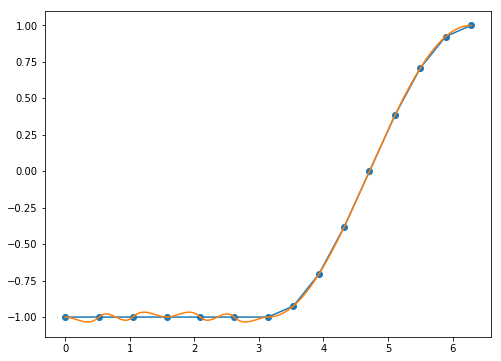

In [238]:
plt.figure(figsize=(8, 6))
plt.plot(neb.path_distances, mx0, 'o-')
plt.plot(x, y)

# Bernstein

In [315]:
import scipy.interpolate as si

In [362]:
derivatives = np.zeros(neb.n_images)
for i in range(neb.n_images):
    derivatives[i] = np.dot(
        neb.scale * (neb.gradientE).reshape(neb.n_images, -1)[i],
        neb.tangents.reshape(neb.n_images, -1)[i])
    
    den = neb.scale[6] * (neb.gradientE).reshape(neb.n_images, -1)[i][6]
    if den != 0:
        derivatives[i] = derivatives[i] / den
    else:
        print(i, derivatives[i])
        deltas[i] = 0

#  = self.energies

# The coefficients for the polynomial approximation
# self.interp_factors[0][:] = E
# self.interp_factors[1][:] = deltas

# Store the polynomial functions
Bernstein_polynomials = []
for i, ds in enumerate(neb.distances):
    Bernstein_polynomials.append(
        si.BPoly.from_derivatives(
            [neb.path_distances[i], neb.path_distances[i + 1]],
            [[mx2[i], derivatives[i]],
             [mx2[i + 1], derivatives[i + 1]]]
        )
    )

0 0.0
14 0.0


In [363]:
derivatives

array([ 0.00000000e+00,  5.00001309e-01,  8.66026779e-01,  7.02868860e+00,
        8.66023854e-01,  4.99988518e-01,  3.11910351e-06, -3.53536032e-01,
       -4.99999498e-01, -3.53558088e-01,  1.71909917e-11,  3.53550286e-01,
        4.99999901e-01,  3.53555795e-01,  0.00000000e+00])

In [364]:
x = np.linspace(0, neb.path_distances[-1], 200)
y = np.zeros_like(x)

for i, yi in enumerate(y):
    
    # ds = self.path_distances
    if x[i] < 0.0 or x[i] > neb.path_distances[-1]:
        raise Exception('x lies outside the valid interpolation range')
    # Find index of the ds array for the value that is closest to x
    ds_idx = np.abs(x[i] - ds).argmin()
    # If x is smaller than the given ds, use the previous ds value so
    # that we use ds(i) when x lies in the interval ds(i) < x < ds(i+1)
    if x[i] < neb.path_distances[ds_idx]:
        ds_idx -= 1

    y[i] = Bernstein_polynomials[ds_idx](x[i])

(-1.1, 1.1)

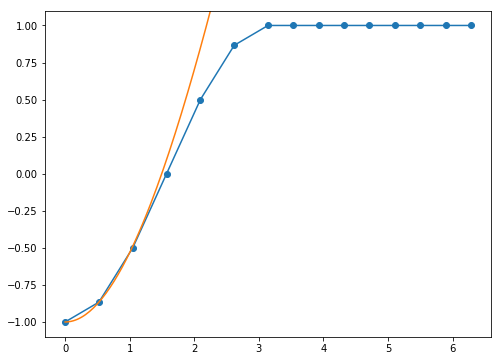

In [366]:
plt.figure(figsize=(8, 6))
plt.plot(neb.path_distances, mx2, 'o-')
plt.plot(x, y)

plt.ylim([-1.1, 1.1])

# Hermite polynomial

As in the Spirit code https://github.com/spirit-code/spirit/

In [303]:
i_factors = [np.zeros(neb.n_images) for i in range(2)]

In [304]:
h00 = lambda x: 2 * x ** 3 - 3 * x ** 2 + 1
h10 = lambda x: -2 * x ** 3 + 3 * x ** 2
h01 = lambda x: x ** 3 - 2 * x ** 2 + x
h11 = lambda x: x ** 3 - x ** 2

In [305]:
i_factors[0][:] = mx0

In [306]:
deltas = np.zeros(neb.n_images)
for i in range(neb.n_images):
    i_factors[1][i] = np.dot(neb.scale * (neb.gradientE).reshape(neb.n_images, -1)[i],
                             neb.tangents.reshape(neb.n_images, -1)[i]
                             )
    den = neb.scale[0] * (neb.gradientE).reshape(neb.n_images, -1)[i][0]
    if den != 0:
        i_factors[1][i] = i_factors[1][i] / den
    else:
        print(i, i_factors[1][i])
        i_factors[1][i] = 0
        

i_factors[1][:-1] *= neb.distances

0 0.0
14 0.0


In [313]:
xs = []
ys = []
n_interp = 20

ds = neb.path_distances
for i, xi in enumerate(ds[:-1]):
    
    x0 = ds[i]
    x1 = ds[i + 1]
    dx = (x1 - x0) / n_interp
    
    for j in range(n_interp):
        
        x = x0 + j * dx
        xrel = j / n_interp

        # Find index of the ds array for the value that is closest to x
        ds_idx = np.abs(x - ds).argmin()
        # If x is smaller than the given ds, use the previous ds value so
        # that we use ds(i) when x lies in the interval ds(i) < x < ds(i+1)
        if x < neb.path_distances[ds_idx]:
            ds_idx -= 1
        
        xs.append(x)
        
        y = (h00(xrel) * i_factors[0][ds_idx] +
             h10(xrel) * i_factors[0][ds_idx + 1] +
             h01(xrel) * i_factors[1][ds_idx] +
             h11(xrel) * i_factors[1][ds_idx + 1]
             )
        
        ys.append(y)

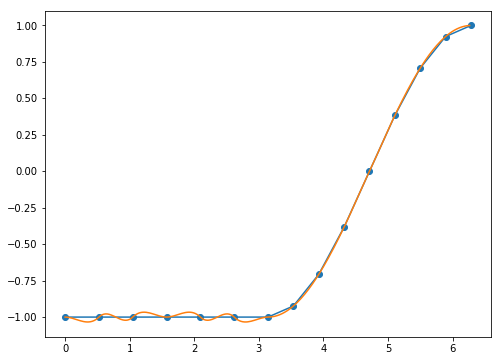

In [314]:
plt.figure(figsize=(8, 6))

plt.plot(neb.path_distances, mx0, 'o-')
plt.plot(xs, ys)